In [ ]:
! pip install tqdm

In [ ]:
! pip install numpy

In [ ]:
! pip install matplotlib

In [ ]:
! pip install scikit-learn

In [2]:
import os
import pandas as pd
import tqdm
import numpy as np
import matplotlib.pyplot as plt


from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
import os

In [3]:
#!git clone https://github.com/MayowaObadina/spam-detection.git
!git pull origin main

Already up to date.


From https://github.com/MayowaObadina/spam-detection
 * branch            main       -> FETCH_HEAD


In [4]:
folder_name = 'spam-detection/data'

feature_column = "text"
label_column = "label_text"

np.random.seed(42)

In [5]:
print('-------------------------------------------------')

train_data = pd.read_csv(f'{folder_name}/train.csv',sep=',')
test_data = pd.read_csv(f'{folder_name}/test.csv',sep=',')

train_data = train_data.astype('U')
test_data = test_data.astype('U')

print(f' Training set size : {train_data.size}   Test set size: {test_data.size}')

-------------------------------------------------
 Training set size : 222012   Test set size: 14000


In [6]:
all_text_list  = train_data[feature_column].values.tolist()+test_data[feature_column].values.tolist()

print('[INFO] Sample data \n',all_text_list[:3])

train_text,train_label = train_data[feature_column].values.tolist(),train_data[label_column].values.tolist()
test_text,test_label = test_data[feature_column].values.tolist(),test_data[label_column].values.tolist()


unique_label = train_data[label_column].unique().tolist()

print('[INFO] Found Labels : ',unique_label)
#

[INFO] Sample data 
 ['any software just for 15 $ - 99 $ understanding oem software\r\nlead me not into temptation ; i can find the way myself .\r\n# 3533 . the law disregards trifles .', "perspective on ferc regulatory action client conf call today , jun e 19 th , 2 : 00 pm edt\r\nperspective on ferc regulatory action client conference call\r\ntoday , tuesday , june 19 th\r\n2 : 00 pm edt\r\nhost : ray niles , power / natural gas analyst\r\nspeaker : steve bergstrom , president & coo of dynegy\r\nsteve bergstrom , president and chief operating officer of dynegy , will join\r\nus at 2 : 00 p . m . today for a conference call discussion of the recent ferc\r\naction imposing price controls in the west . the discussion will be followed\r\nby q & a .\r\nquestions to be explored include :\r\nwhat are the implications of the ferc action , for dyn and the industry as a\r\nwhole ?\r\nwhat is the earnings impact ?\r\nwhat are the risks of further re - regulation ?\r\nand whatever else is on you

In [7]:
vectorizer = CountVectorizer(analyzer='char_wb',ngram_range=(1, 3))
vectorizer.fit_transform(all_text_list)

# # TfidfVectorizer
# vectorizer = TfidfVectorizer(analyzer='char_wb',ngram_range=(1, 3))
# vectorizer.fit_transform(all_text_list)

X_train = vectorizer.transform(train_text).toarray()
X_test= vectorizer.transform(test_text).toarray()

y_train = []
for i in train_label:
    y_train.append(unique_label.index(i))

y_test = []
for i in test_label:
    y_test.append(unique_label.index(i))

print(f'Sizes : {X_train.shape,X_test.shape,len(y_train),len(y_test)}')

Sizes : ((31716, 26339), (2000, 26339), 31716, 2000)


=======   MultinomialNB   =========
acc: 0.941     |  f1_score: 0.9409395220706003
              precision    recall  f1-score   support

        spam       0.92      0.97      0.94      1008
         ham       0.96      0.92      0.94       992

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000

f1 = 0.9409546415529502
loss = None
precision = 0.941996533127889
recall = 0.941


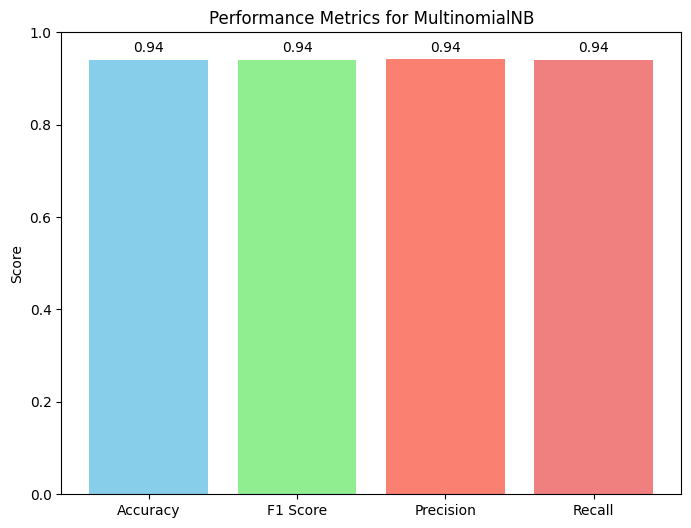

In [10]:
print('=======   MultinomialNB   =========')

classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Predict Class
y_pred = classifier.predict(X_test)

# Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred, average='macro')


print(f'acc: {accuracy}     |  f1_score: {f1}')
print(metrics.classification_report(y_test, y_pred, target_names=unique_label))

if not os.path.exists(f"MultinomialNB"):
    os.makedirs(f"MultinomialNB")

acc = metrics.accuracy_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred,average='weighted')
precision = metrics.precision_score(y_test, y_pred,average='weighted')
recall = metrics.recall_score(y_test, y_pred,average='weighted')

print(f"f1 = {f1}")
print(f"loss = {None}")
print(f"precision = {precision}")
print(f"recall = {recall}")

# Create a bar chart for the metrics
metrics_dict = {'Accuracy': acc, 'F1 Score': f1, 'Precision': precision, 'Recall': recall}

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(metrics_dict.keys(), metrics_dict.values(), color=['skyblue', 'lightgreen', 'salmon', 'lightcoral'])

plt.title('Performance Metrics for MultinomialNB')
plt.ylabel('Score')
plt.ylim([0, 1])  # Since metrics range between 0 and 1

# Display the values on top of the bars
for i, v in enumerate(metrics_dict.values()):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom')

# Show the plot
plt.show()

=======   KNeighborsClassifier   =========
acc: 0.9055     |  f1_score: 0.9051865229414753
              precision    recall  f1-score   support

        spam       0.87      0.96      0.91      1008
         ham       0.95      0.85      0.90       992

    accuracy                           0.91      2000
   macro avg       0.91      0.91      0.91      2000
weighted avg       0.91      0.91      0.91      2000

f1 = 0.9052301371409222
loss = None
precision = 0.9094446234943873
recall = 0.9055


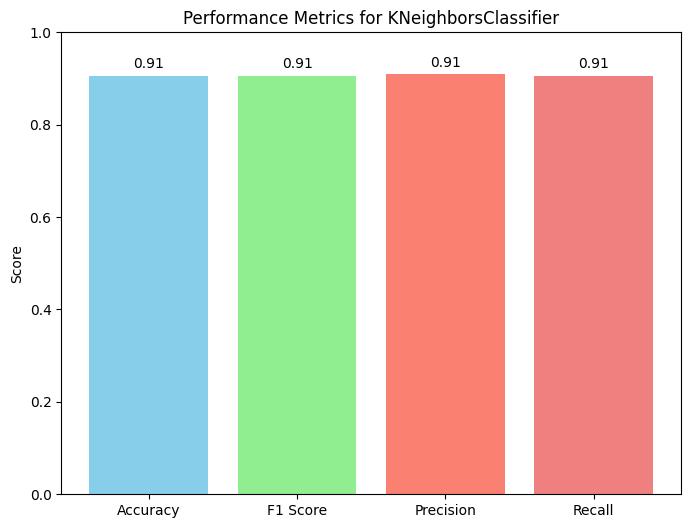

In [11]:
print('=======   KNeighborsClassifier   =========')

classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

# Predict Class
y_pred = classifier.predict(X_test)

# Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred, average='macro')


print(f'acc: {accuracy}     |  f1_score: {f1}')
print(metrics.classification_report(y_test, y_pred, target_names=unique_label))

if not os.path.exists(f"KNeighborsClassifier"):
    os.makedirs(f"KNeighborsClassifier")

acc = metrics.accuracy_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred,average='weighted')
precision = metrics.precision_score(y_test, y_pred,average='weighted')
recall = metrics.recall_score(y_test, y_pred,average='weighted')

print(f"f1 = {f1}")
print(f"loss = {None}")
print(f"precision = {precision}")
print(f"recall = {recall}")

# Create a bar chart for the metrics
metrics_dict = {'Accuracy': acc, 'F1 Score': f1, 'Precision': precision, 'Recall': recall}

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(metrics_dict.keys(), metrics_dict.values(), color=['skyblue', 'lightgreen', 'salmon', 'lightcoral'])

plt.title('Performance Metrics for KNeighborsClassifier')
plt.ylabel('Score')
plt.ylim([0, 1])  # Since metrics range between 0 and 1

# Display the values on top of the bars
for i, v in enumerate(metrics_dict.values()):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom')

# Show the plot
plt.show()

=======   MLPClassifier   =========
acc: 0.9845     |  f1_score: 0.9844993450973303
              precision    recall  f1-score   support

        spam       0.99      0.98      0.98      1008
         ham       0.98      0.99      0.98       992

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000

f1 = 0.9845001511313853
loss = None
precision = 0.9845047326183155
recall = 0.9845


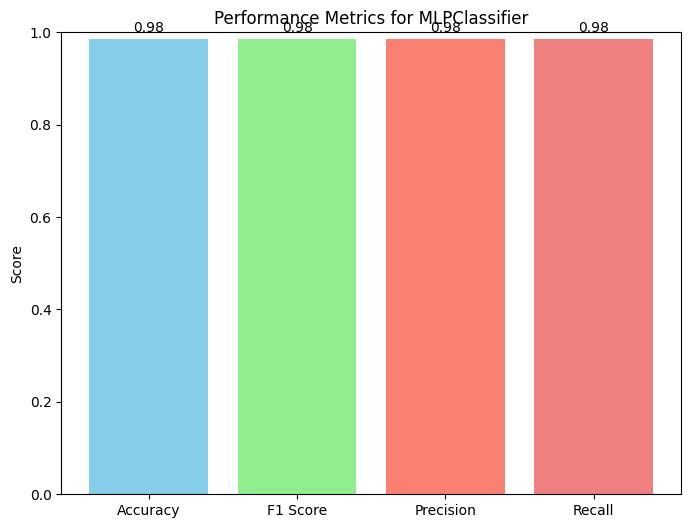

In [12]:
print('=======   MLPClassifier   =========')

classifier = MLPClassifier(random_state=1, max_iter=300)
classifier.fit(X_train, y_train)

# Predict Class
y_pred = classifier.predict(X_test)

# Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred, average='macro')


print(f'acc: {accuracy}     |  f1_score: {f1}')
print(metrics.classification_report(y_test, y_pred, target_names=unique_label))

if not os.path.exists(f"MLPClassifier"):
    os.makedirs(f"MLPClassifier")

acc = metrics.accuracy_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred,average='weighted')
precision = metrics.precision_score(y_test, y_pred,average='weighted')
recall = metrics.recall_score(y_test, y_pred,average='weighted')

print(f"f1 = {f1}")
print(f"loss = {None}")
print(f"precision = {precision}")
print(f"recall = {recall}")

# Create a bar chart for the metrics
metrics_dict = {'Accuracy': acc, 'F1 Score': f1, 'Precision': precision, 'Recall': recall}

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(metrics_dict.keys(), metrics_dict.values(), color=['skyblue', 'lightgreen', 'salmon', 'lightcoral'])

plt.title('Performance Metrics for MLPClassifier')
plt.ylabel('Score')
plt.ylim([0, 1])  # Since metrics range between 0 and 1

# Display the values on top of the bars
for i, v in enumerate(metrics_dict.values()):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom')

# Show the plot
plt.show()

=======   SVC   =========
acc: 0.9775     |  f1_score: 0.9775
              precision    recall  f1-score   support

        spam       0.98      0.98      0.98      1008
         ham       0.98      0.98      0.98       992

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000

f1 = 0.977499679346061
loss = None
precision = 0.9775037579547124
recall = 0.9775


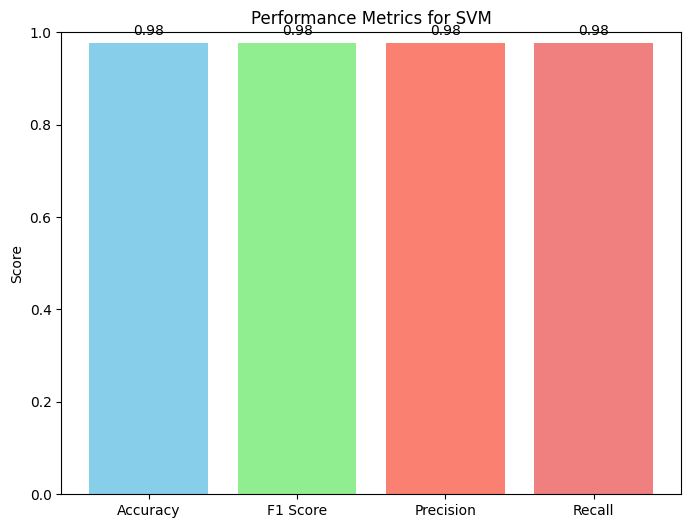

In [8]:
print('=======   SVC   =========')
#classifier = SVC(gamma='auto')
classifier = SVC(gamma='scale', kernel='linear')

classifier.fit(X_train, y_train)
# Predict Class
y_pred = classifier.predict(X_test)

# Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred, average='micro')


print(f'acc: {accuracy}     |  f1_score: {f1}')
print(metrics.classification_report(y_test, y_pred, target_names=unique_label))

if not os.path.exists(f"SVC"):
    os.makedirs(f"SVC")

acc = metrics.accuracy_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred,average='weighted')
precision = metrics.precision_score(y_test, y_pred,average='weighted')
recall = metrics.recall_score(y_test, y_pred,average='weighted')

print(f"f1 = {f1}")
print(f"loss = {None}")
print(f"precision = {precision}")
print(f"recall = {recall}")

# Create a bar chart for the metrics
metrics_dict = {'Accuracy': acc, 'F1 Score': f1, 'Precision': precision, 'Recall': recall}

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(metrics_dict.keys(), metrics_dict.values(), color=['skyblue', 'lightgreen', 'salmon', 'lightcoral'])

plt.title('Performance Metrics for SVM')
plt.ylabel('Score')
plt.ylim([0, 1])  # Since metrics range between 0 and 1

# Display the values on top of the bars
for i, v in enumerate(metrics_dict.values()):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom')

# Show the plot
plt.show()

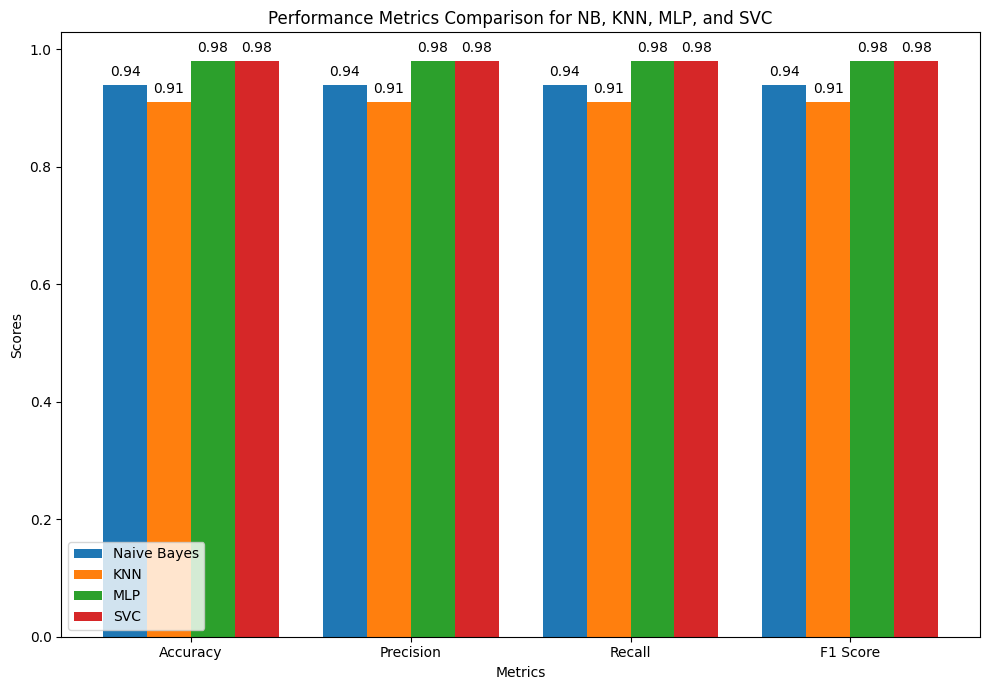

In [10]:
models = ['Naive Bayes', 'KNN', 'MLP', 'SVC']

nb_metrics = {'Accuracy': 0.94, 'Precision': 0.94, 'Recall': 0.94, 'F1 Score': 0.94}
knn_metrics = {'Accuracy': 0.91, 'Precision': 0.91, 'Recall': 0.91, 'F1 Score': 0.91}
mlp_metrics = {'Accuracy': 0.98, 'Precision': 0.98, 'Recall': 0.98, 'F1 Score': 0.98}
svc_metrics = {'Accuracy': 0.98, 'Precision': 0.98, 'Recall': 0.98, 'F1 Score': 0.98}

metrics_dict = {
    'Naive Bayes': nb_metrics,
    'KNN': knn_metrics,
    'MLP': mlp_metrics,
    'SVC': svc_metrics
}

# Organize data for plotting
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = np.array([[metrics_dict[model][metric] for metric in metrics] for model in models])

# Plotting
fig, ax = plt.subplots(figsize=(10, 7))

# Set the positions and width for the bars
positions = np.arange(len(metrics))
width = 0.2

# Plot bars for each model
for i, model in enumerate(models):
    ax.bar(positions + i * width, values[i], width=width, label=model)

# Add labels and title
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics Comparison for NB, KNN, MLP, and SVC')
ax.set_xticks(positions + width * 1.5)
ax.set_xticklabels(metrics)
ax.legend()

# Display the values on top of the bars
for i in range(len(models)):
    for j in range(len(metrics)):
        ax.text(j + i * width, values[i][j] + 0.01, f"{values[i][j]:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()
